Disabling autoscroll for multiple figures.

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 7,5
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
import numpy as np
import gzip
import json
import re
import copy

In [4]:
df = pd.read_csv('results.csv.gz')

## Fairness vs. density (nearest alg.)

### "stay", "home", "false"

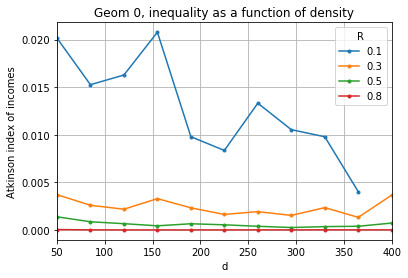

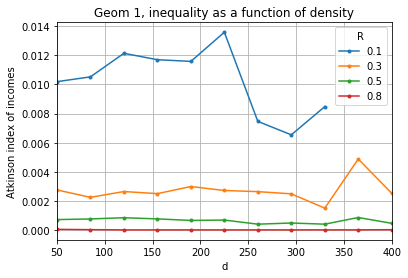

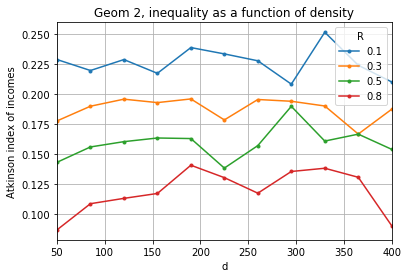

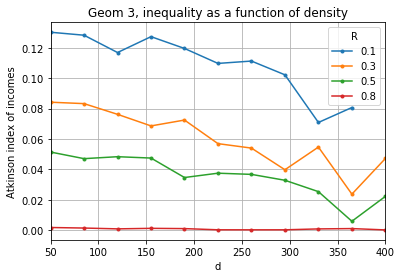

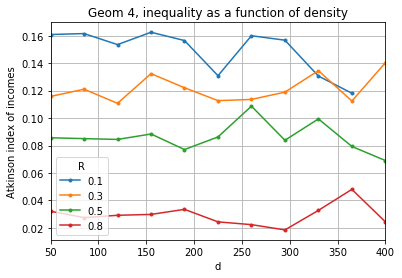

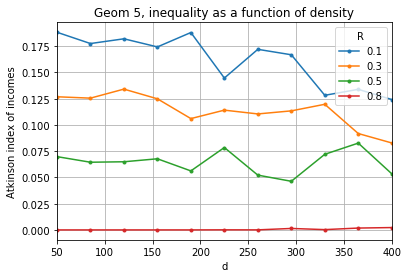

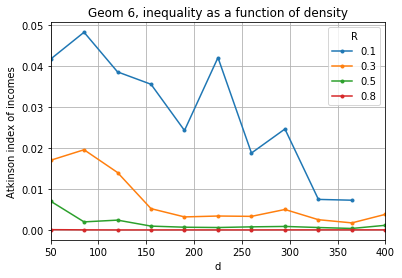

In [4]:
cond1 = df['R'].map(lambda R: R in [0.1,0.3,0.5,0.8])
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond2&cond3&cond4][['d','atkinson','R']]\
    .pivot_table(values='atkinson',index='d',columns='R',aggfunc=lambda x: x).plot(style='.-')
    plt.title('Geom '+str(geom) + ', inequality as a function of density')
    plt.ylabel('Atkinson index of incomes')

* Miert ilyen ugralosak a gorbek?
* Az R szerinti sorrend mindig megmarad, minel kevesebben vannak a requestek, annal egyenlotlenebb a jovedelmek eloszlasa.
* A reggeli/esti forgalom iranya szamit, nem szimmetrikus a kezdeti es a vegso geometriak felcserelese.
* Mindig olyankor nagyobb az egyenlotlenseg, ha az origin es a destination distribution nem egyezik meg, raadasul akkor nagyobb, ha kifele mennek tobben.


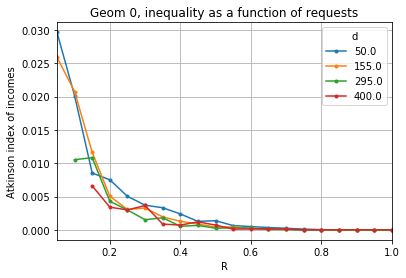

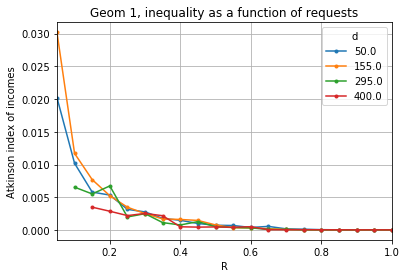

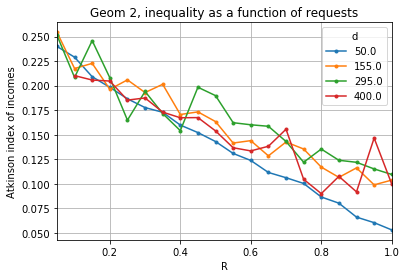

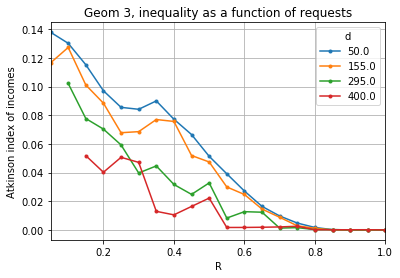

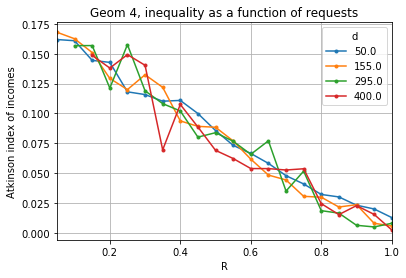

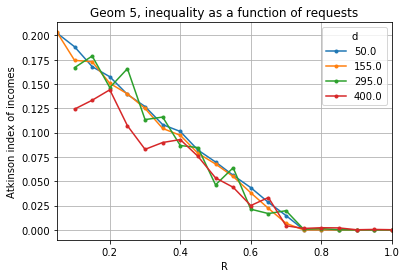

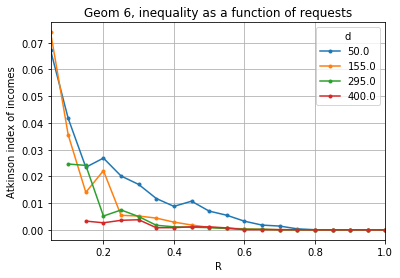

In [5]:
cond1 = df['d'].map(lambda d: d in [50.,155.,295.,400.])
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond2&cond3&cond4][['d','atkinson','R']]\
    .pivot_table(values='atkinson',index='R',columns='d',aggfunc=lambda x: x).plot(style='.-')
    plt.title('Geom '+str(geom) + ', inequality as a function of requests')
    plt.ylabel('Atkinson index of incomes')

* Az aszimmetrikus geometriaknal nagyobb az egyenlotlenseg.
* Ahogy tobb request van, csokken az egyenlotlenseg.
* De a densityk nem "sorrendben" vannak az abrakon mindenhol (l. Geom 2-3)
* A telitodes utan egyenlo a jovedelmek eloszlasa

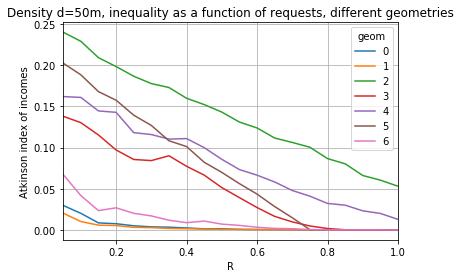

In [6]:
cond1 = df['d']==50
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])


plt.figure(figsize=(20,10))
df[cond1&cond2&cond3][['geom','atkinson','R']].pivot_table(values='atkinson',index='R',columns='geom',aggfunc=lambda x: x).plot()
plt.ylabel('Atkinson index of incomes')
plt.title("Density d=50m, inequality as a function of requests, different geometries")

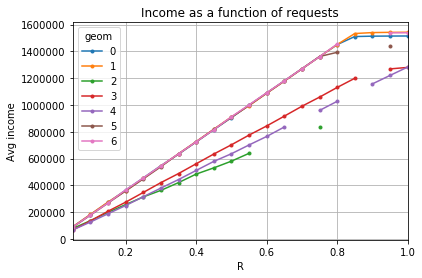

In [7]:
cond1 = df['d']==50
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])


plt.figure(figsize=(20,10))
df[cond1&cond2&cond3][['geom','avg_trip_avg_price','R']]\
.pivot_table(values='avg_trip_avg_price',index='R',columns='geom',aggfunc=lambda x: x).plot(style='.-')
plt.ylabel('Avg income')
plt.title("Income as a function of requests")

### "go_back", "base", "false"

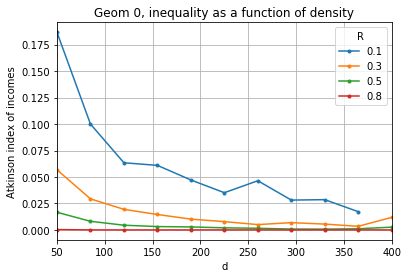

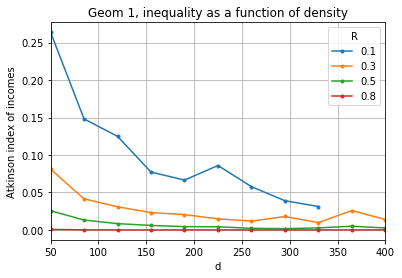

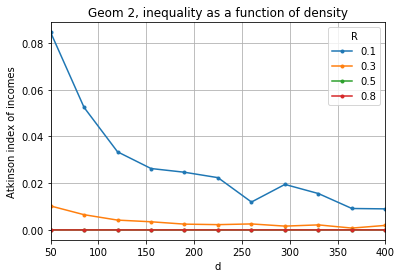

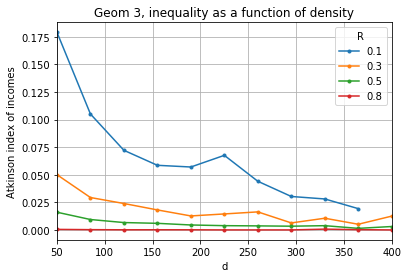

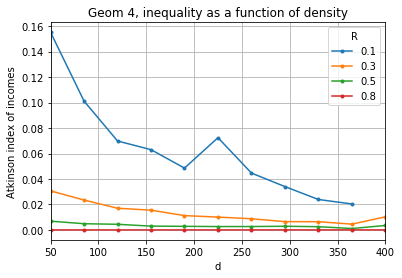

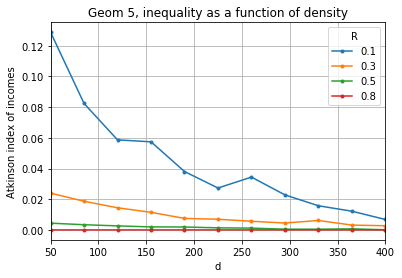

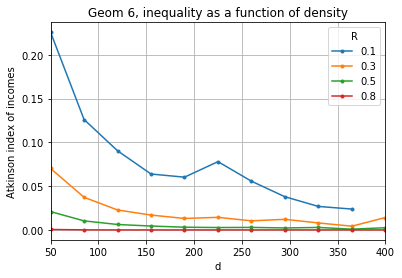

In [8]:
cond1 = df['R'].map(lambda R: R in [0.1,0.3,0.5,0.8])
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond2&cond3&cond4][['d','atkinson','R']]\
    .pivot_table(values='atkinson',index='d',columns='R',aggfunc=lambda x: x).plot(style='.-')
    plt.title('Geom '+str(geom) + ', inequality as a function of density')
    plt.ylabel('Atkinson index of incomes')

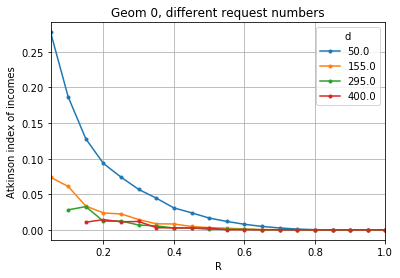

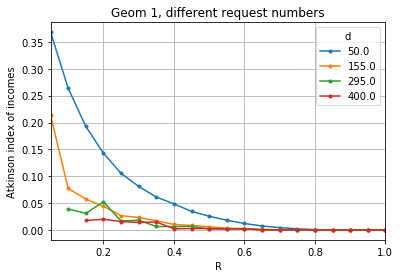

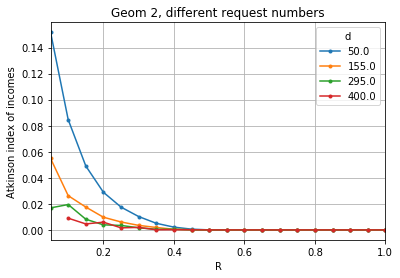

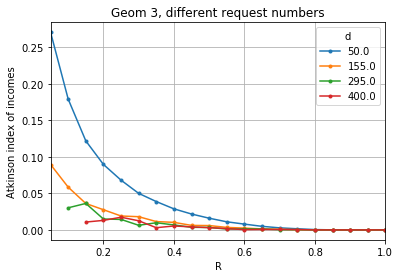

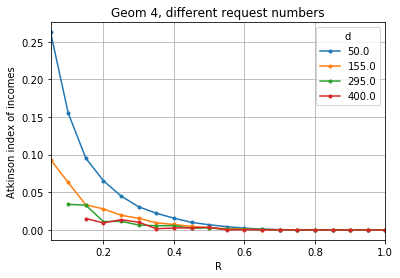

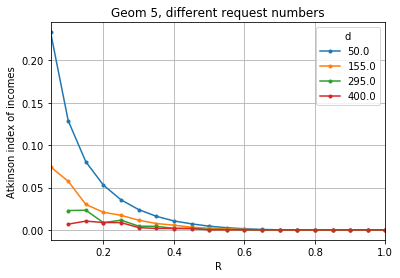

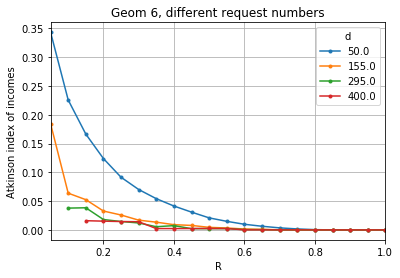

In [9]:
cond1 = df['d'].map(lambda d: d in [50.,155.,295.,400.])
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond2&cond3&cond4][['d','atkinson','R']]\
    .pivot_table(values='atkinson',index='R',columns='d',aggfunc=lambda x: x).plot(style='.-')
    plt.title('Geom '+str(geom) + ', different request numbers')
    plt.ylabel('Atkinson index of incomes')

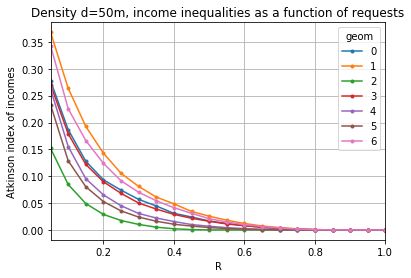

In [10]:
cond1 = df['d']==50
cond2 = df['matching']=='nearest'
cond3 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])


df[cond1&cond2&cond3][['geom','atkinson','R']]\
.pivot_table(values='atkinson',index='R',columns='geom',aggfunc=lambda x: x).plot(style='.-')
plt.ylabel('Atkinson index of incomes')
plt.title('Density d=50m, income inequalities as a function of requests')

### A ket strategia osszehasonlitasa az atlagos jovedelmekben

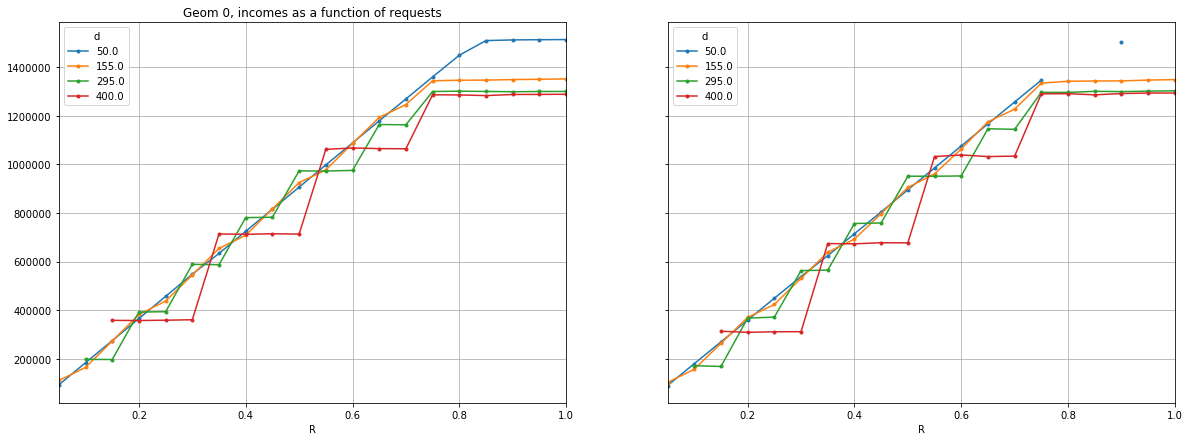

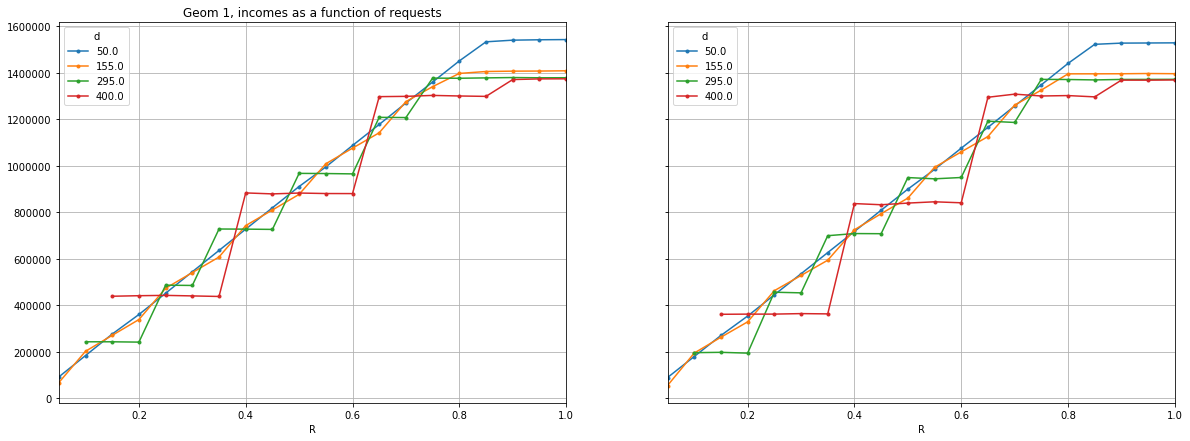

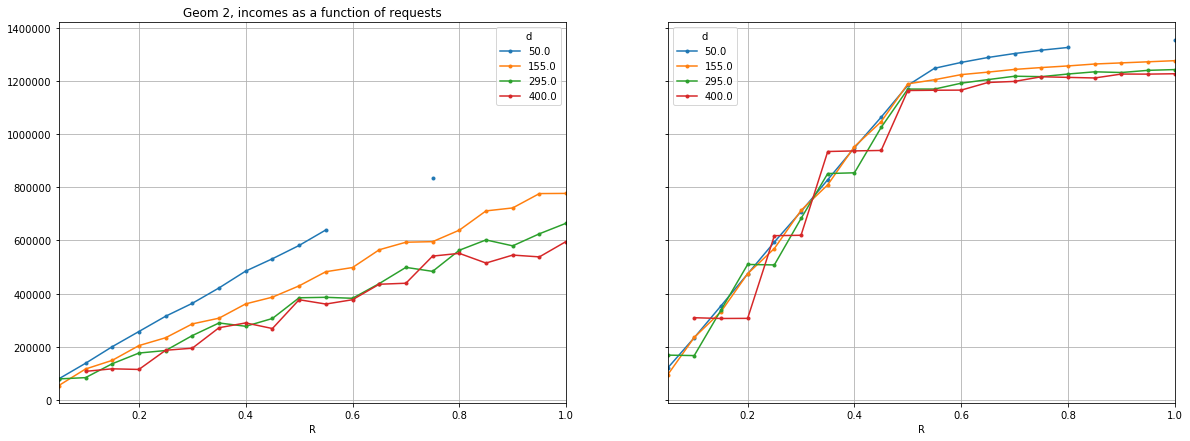

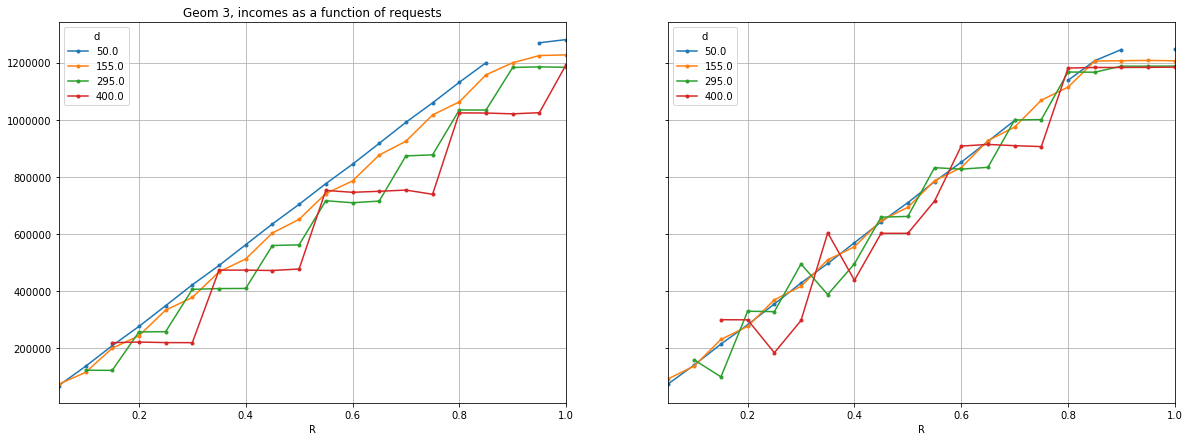

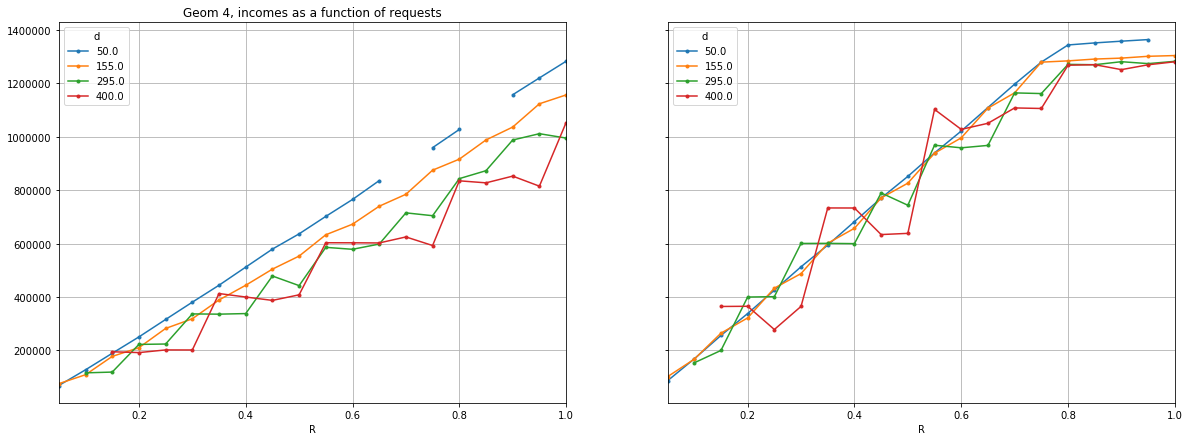

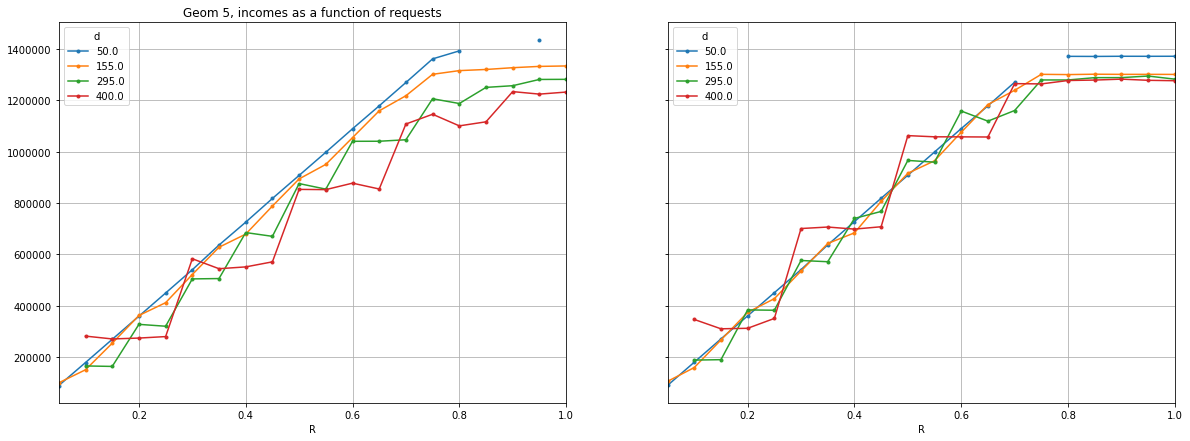

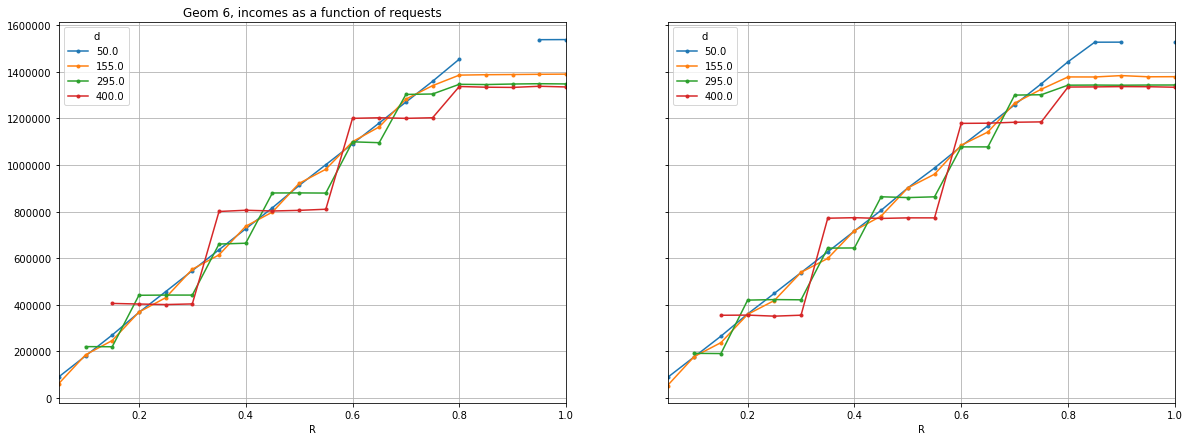

In [11]:
cond1 = df['d'].map(lambda d: d in [50.,155.,295.,400.])
cond2 = df['matching']=='nearest'
cond31 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])
cond32 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    fig, ax = plt.subplots(1,2,sharey=True,figsize=(20,7))
    df[cond1&cond2&cond31&cond4][['d','avg_trip_avg_price','R']]\
        .pivot_table(values='avg_trip_avg_price',index='R',columns='d',aggfunc=lambda x: x)\
        .plot(ax=ax[0], style='.-')
    plt.grid()
    df[cond1&cond2&cond32&cond4][['d','avg_trip_avg_price','R']]\
        .pivot_table(values='avg_trip_avg_price',index='R',columns='d',aggfunc=lambda x: x)\
        .plot(ax=ax[1], style='.-')
    ax[0].set_title('Geom '+str(geom) + ", incomes as a function of requests")
    plt.ylabel("Average income")

A fenti abrakon a bal oldalon az a strategia van, amikor ott maradnak a taxisok, ahol kiraktak az utast, a jobb oldalon pedig az, amikor miutan kiraktak az utast, visszaindulnak a kozpontba.

Azt lattuk, hogy az unfairness meglepoen valtozott a cruising strategiaval (l. fentebb, illetve lentebb), igy azt is meg szerettuk volna nezni, hogy hogyan alakul a bevetel, tehat mennyire jo/rossz atlagos helyzetbol alakul ki az unfairness.

Altalaban a cruising/waiting ugyanarra a bevetelre vezet, kiveve, ha a varosbol kifele meno geometriak vannak (2-es, 4-es), aminel tobb lesz a bevetel, ha a taxisok elkezdenek visszamenni a kozpont fele.

Ilyenkor amellett, hogy a visszameno strategia novel a taxisok bevetelen, csokkenti az unfairnesst is.

#### Side comment

A lepcsok lehetseges magyarazata?

In [12]:
#conditions
c1 = df.d == 400
c2 = df.behaviour == "stay"
c3 = df.initial_conditions == "home"
c4 = df.matching == "nearest"
c5 = df.geom == 0
c6 = pd.isnull(df.reset_time)
#c7 = df.R.map(lambda R: R in [0.35,0.4,0.45,0.5])

conds = [c1,c2,c3,c4,c5,c6]

df[np.all(conds,axis=0)]["request_rate"]

17618    1.0
17730    1.0
17842    1.0
17954    1.0
18066    2.0
18178    2.0
18290    2.0
18402    2.0
18514    3.0
18626    3.0
18738    3.0
18850    3.0
18962    4.0
19074    4.0
19186    4.0
19298    4.0
19410    5.0
19522    5.0
Name: request_rate, dtype: float64

## Poorest algorithm

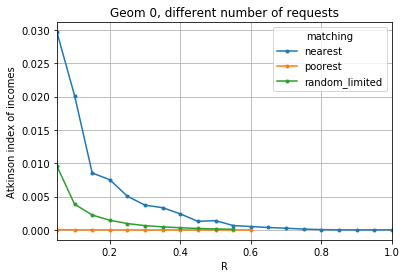

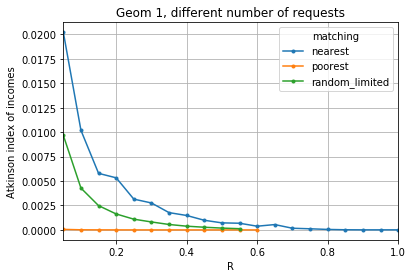

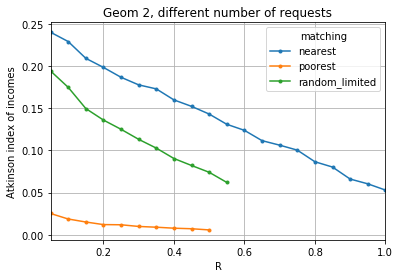

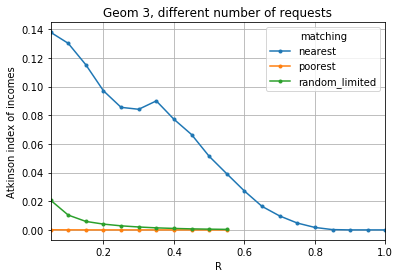

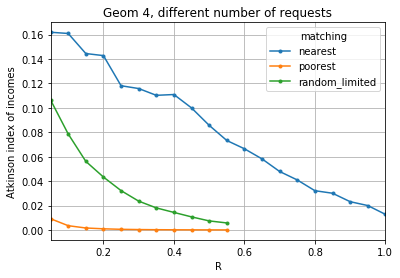

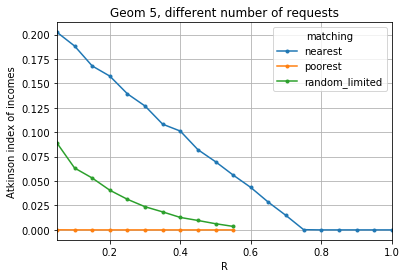

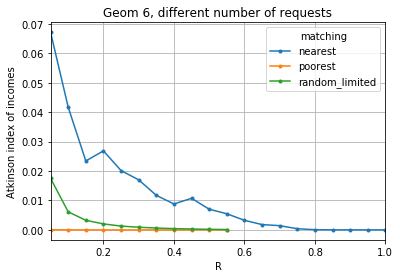

In [13]:
cond1 = df['d'] == 50.0
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond3&cond4][['matching','atkinson','R']]\
    .pivot_table(values='atkinson',index='R',columns='matching',aggfunc=lambda x: x).plot(style='.-')
    plt.title('Geom '+str(geom) + ', different number of requests')
    plt.ylabel('Atkinson index of incomes')

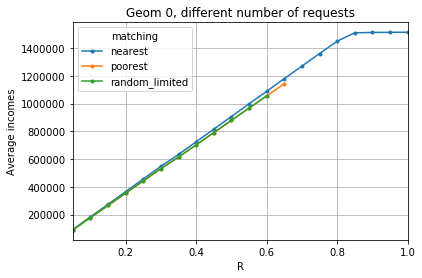

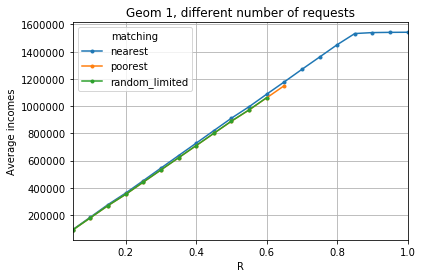

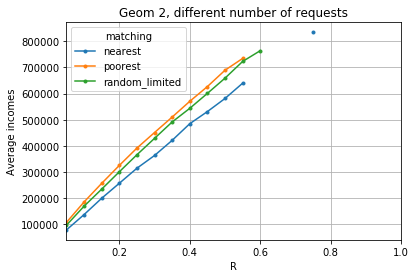

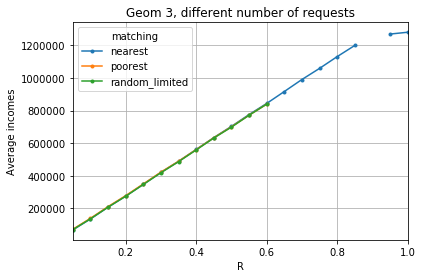

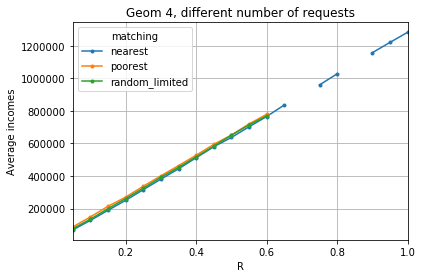

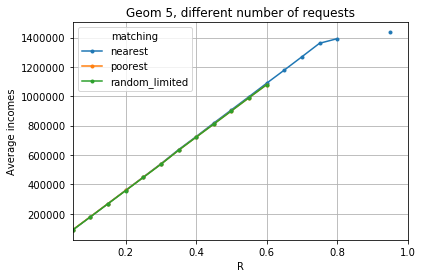

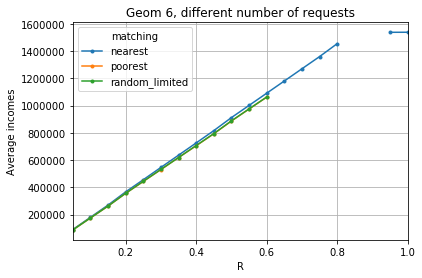

In [14]:
cond1 = df['d'] == 50.0
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond3&cond4][['matching','avg_trip_avg_price','R']]\
    .pivot_table(values='avg_trip_avg_price',index='R',columns='matching',aggfunc=lambda x: x).plot(style='.-')
    plt.title('Geom '+str(geom) + ', different number of requests')
    plt.ylabel('Average incomes')

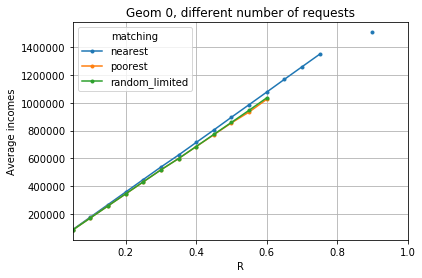

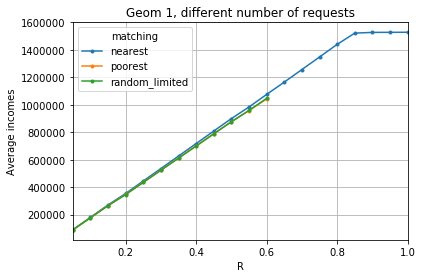

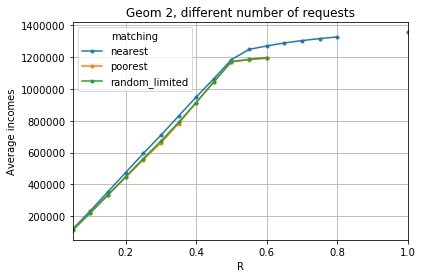

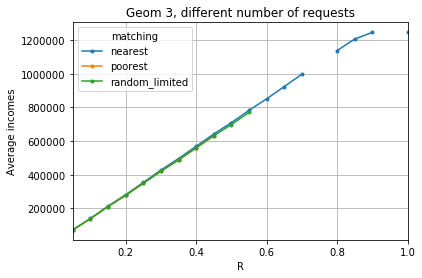

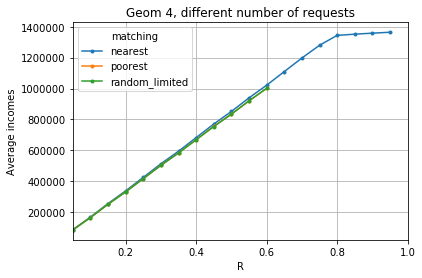

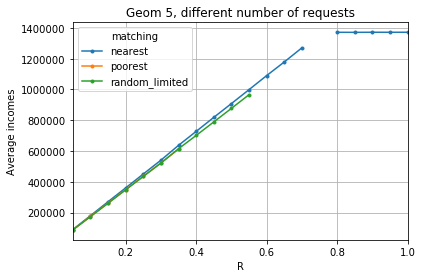

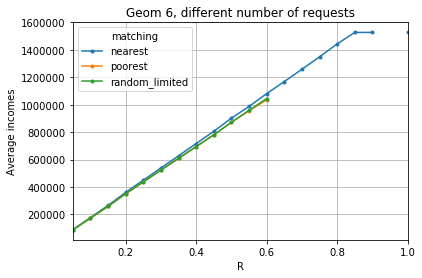

In [15]:
cond1 = df['d'] == 50.0
cond3 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])

for geom in range(7):
    cond4 = df['geom']==geom

    df[cond1&cond3&cond4][['matching','avg_trip_avg_price','R']]\
    .pivot_table(values='avg_trip_avg_price',index='R',columns='matching',aggfunc=lambda x: x).plot(style='.-')
    plt.title('Geom '+str(geom) + ', different number of requests')
    plt.ylabel('Average incomes')

## Comparing income distributions

Comparing income distributions for the cruising and waiting strategies with given R, d and algorithm.

In [16]:
def get_incomes(run_id):
    """
    Given a run_id, this function returns the incomes of all taxis at the end of the simulations.
    """
    fname = '../results/run_' + run_id + '_per_taxi_metrics.json.gz'
    try:
        e = gzip.open(fname,'rb').readlines()[-1]
    except FileNotFoundError:
        return []
    ptm = json.loads(re.sub('nan','null',e.decode('utf8').strip('\n'))) 
    if 'trip_avg_price' in ptm:
        return ptm['trip_avg_price']
    elif 'trip_income' in ptm:
        return ptm['trip_income']

In [5]:
# selecting a specific part of the dataframe

cond1 = df['d']==85.0
cond2 = df['R']==0.15
cond3 = df['matching'] == 'nearest'

cond4 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])
cond5 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])

# waiting
sdf1 = copy.deepcopy(df[cond1&cond2&cond3&cond4])
sdf1['behav'] = 'waiting'
# cruising
sdf2 = copy.deepcopy(df[cond1&cond2&cond3&cond5])
sdf2['behav'] = 'cruising'

sdf = pd.concat([sdf1,sdf2],ignore_index=True)
sdf['incomes'] = sdf['run_id'].map(get_incomes)
sdf = sdf[['geom','incomes','behav']]

sdf_flatten = sdf\
    .set_index(['geom','behav'])['incomes']\
    .apply(pd.Series)\
    .stack()\
    .reset_index(level=0)\
    .reset_index()\
    .drop('level_1',axis=1)\
    .rename(columns={0:'income'})

NameError: name 'get_incomes' is not defined

In [1]:
sns.violinplot(
    x="geom",
    y="income",
    hue="behav",
    data=sdf_flatten,
    palette="Pastel1",
    inner=None,
    split=True,
    linewidth=0.5
)
plt.legend()

NameError: name 'sns' is not defined

In [19]:
# selecting a specific part of the dataframe

cond1 = df['d']==120.0
cond2 = df['R']==0.15
cond3 = df['matching'] == 'poorest'

cond4 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])
cond5 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])

# waiting
sdf1 = copy.deepcopy(df[cond1&cond2&cond3&cond4])
sdf1['behav'] = 'waiting'
# cruising
sdf2 = copy.deepcopy(df[cond1&cond2&cond3&cond5])
sdf2['behav'] = 'cruising'

sdf = pd.concat([sdf1,sdf2],ignore_index=True)
sdf['incomes'] = sdf['run_id'].map(get_incomes)
sdf = sdf[['geom','incomes','behav']]

sdf_flatten = sdf\
    .set_index(['geom','behav'])['incomes']\
    .apply(pd.Series)\
    .stack()\
    .reset_index(level=0)\
    .reset_index()\
    .drop('level_1',axis=1)\
    .rename(columns={0:'income'})

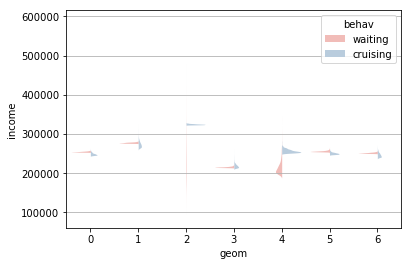

In [20]:
sns.violinplot(
    x="geom",
    y="income",
    hue="behav",
    data=sdf_flatten,
    palette="Pastel1",
    inner=None,
    split=True,
    linewidth=0
)

Comparing income distributions for the different algorithms with given R, d and the waiting behaviour.

In [21]:
# selecting a specific part of the dataframe

cond1 = df['d']==120.0
cond2 = df['R']==0.15
cond4 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])

# waiting
sdf = copy.deepcopy(df[cond1&cond2&cond4])
sdf['incomes'] = sdf['run_id'].map(get_incomes)
sdf = sdf[['geom','incomes','matching']]

sdf_flatten = sdf\
    .set_index(['geom','matching'])['incomes']\
    .apply(pd.Series)\
    .stack()\
    .reset_index(level=0)\
    .reset_index()\
    .drop('level_1',axis=1)\
    .rename(columns={0:'income'})

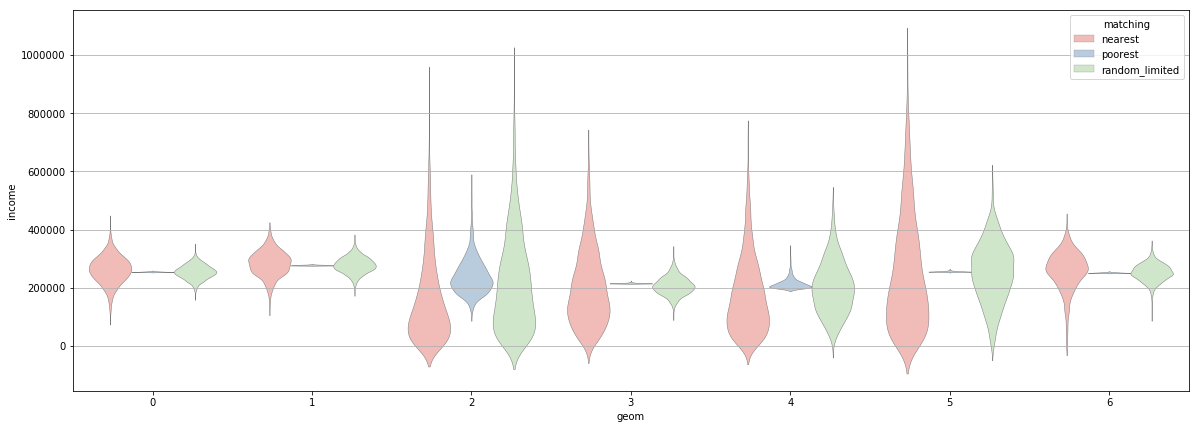

In [22]:
plt.figure(figsize=(20,7))
sns.violinplot(
    x="geom",
    y="income",
    hue="matching",
    data=sdf_flatten,
    palette="Pastel1",
    inner=None,
    scale="width",
    linewidth=0.5,
)

In [23]:
# selecting a specific part of the dataframe

cond1 = df['d']==120.0
cond2 = df['R']==0.15
cond4 = (df['behaviour']=='go_back') & (df['initial_conditions']=='base') & pd.isnull(df['reset_time'])

# waiting
sdf = copy.deepcopy(df[cond1&cond2&cond4])
sdf['incomes'] = sdf['run_id'].map(get_incomes)
sdf = sdf[['geom','incomes','matching']]

sdf_flatten = sdf\
    .set_index(['geom','matching'])['incomes']\
    .apply(pd.Series)\
    .stack()\
    .reset_index(level=0)\
    .reset_index()\
    .drop('level_1',axis=1)\
    .rename(columns={0:'income'})

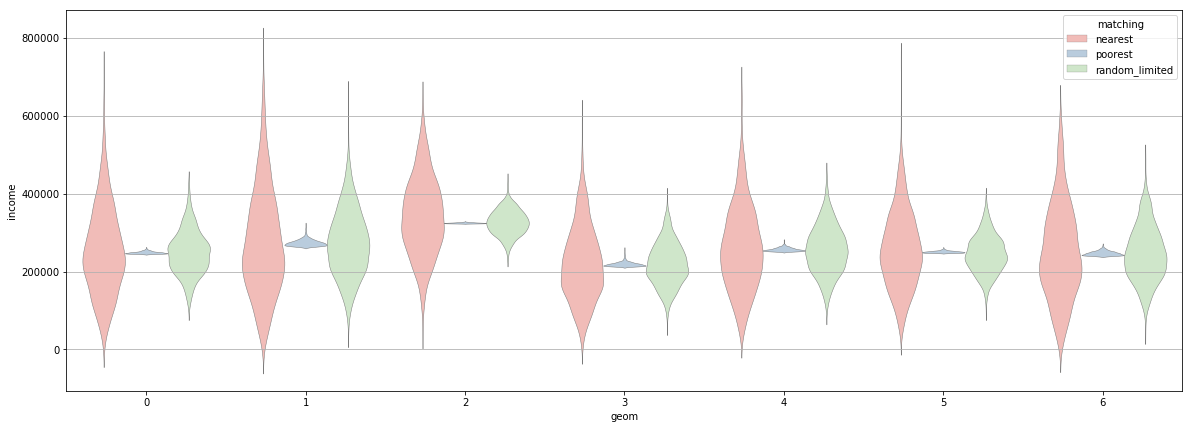

In [24]:
plt.figure(figsize=(20,7))
sns.violinplot(
    x="geom",
    y="income",
    hue="matching",
    data=sdf_flatten,
    palette="Pastel1",
    inner=None,
    scale="width",
    linewidth=0.5,
)

## NYC

In [25]:
import os

In [26]:
# reading nyc configs
configs = []

for f in os.listdir('../configs/'):
    if 'nyc' in f:
        with open('../configs/' + f) as fs:
            configs.append(json.loads(fs.read().strip('\n')))
            configs[-1]['run_id'] = re.sub('\.conf','',f)

nyc_configs = pd.DataFrame.from_dict(configs)
nyc_configs.set_index('run_id',inplace=True)

In [27]:
# calculating atkinson indices for nyc data
from ineqpy import atkinson

def calc_atkinson(t):
    """
    Given a dictionary with the results, it calculates the Atkinson index
    of the incomes.
    """
    if "trip_avg_price" in t:
        return {"run_id" : t["run_id"], "atkinson" : atkinson(np.array(list(map(float,t["trip_avg_price"]))))}
    elif "trip_income" in t:
        return {"run_id" : t["run_id"], "atkinson" : atkinson(np.array(list(map(float,t["trip_income"]))))}
    else:
        return {"run_id" : t["run_id"], "atkinson" : None } 

results = []

for f in os.listdir('../results/'):
    if 'nyc' in f and 'per_taxi_metrics' in f:
        with gzip.open('../results/' + f,'rb') as fs:
            results.append(
                json.loads(
                    re.sub(
                        'nan',
                        'null',
                        fs.readlines()[-2].decode('utf8')\
                        .strip('\n')\
                        .replace('\'','\"')
                    )
                )
            )
            results[-1]["run_id"] = re.sub('_per_taxi_metrics.json.gz','',re.sub('run_','',f))
            results[-1] = calc_atkinson(results[-1])

atkinson_df = pd.DataFrame.from_dict(results)
atkinson_df.set_index('run_id',inplace=True)

In [28]:
# getting aggregate metrics for nyc data

results=[]

for f in os.listdir('../results/'):
    if 'nyc' in f and 'aggregate' in f:
        results.append(pd.read_csv('../results/'+f,compression='gzip').iloc[-1,].to_dict())
        results[-1]["run_id"] = re.sub('_aggregates.csv.gz','',re.sub('run_','',f))

aggregate_df = pd.DataFrame.from_dict(results)
aggregate_df.set_index('run_id',inplace=True)

In [30]:
# joining results

# joining the different results
merged_nyc = nyc_configs.join(atkinson_df).join(aggregate_df,rsuffix="_2")

# adding a geom column from the run_ids
merged_nyc["geom"]=merged_nyc.index.map(lambda s: re.sub(r'^.+geom_([0-9])$',r'\1',s))

In [31]:
cond1 = (df['d']==120.0) & (df['R']==0.1)
cond2 = (df['geom']==0) | (df['geom']==2)
cond3 = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])
cond4 = (~df['matching'].str.contains('unlimited'))

In [32]:
sdf = copy.deepcopy(df[cond1&cond2&cond3&cond4])
sdf.set_index('run_id',inplace=True)
sdf = pd.concat([merged_nyc,sdf])

def select_not_nan(x,y):
    """
    Out of two elements, returns the one that is not a pandas NaN.
    If both are NaNs, returns a NaN.
    """
    if pd.isnull(x):
        return y
    else:
        return x

# merging names from old and new code to one single column
for prefix in ['avg', 'std']:
    sdf[prefix+'_trip_avg_price'] = sdf[prefix+'_trip_avg_price'].combine(sdf[prefix+'_trip_income'],select_not_nan)
    sdf.drop(prefix+'_trip_income',axis=1,inplace=True)
    
sdf['geom'] = sdf.geom.map(int)

In [33]:
def size(run_id):
    if 'nyc' in run_id:
        return 'nyc'
    else:
        return 'simulation'

sdf['size'] = sdf.index.map(size)

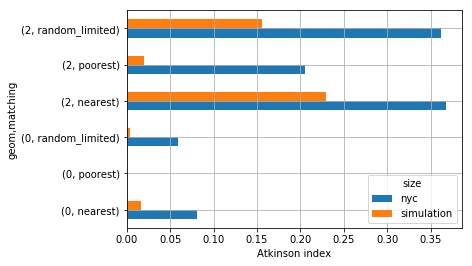

In [68]:
sdf.pivot_table(values='atkinson',index=['geom','matching'],columns=['size']).plot(kind='barh')
plt.xlabel('Atkinson index')

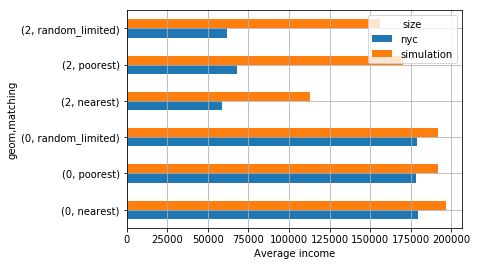

In [70]:
sdf.pivot_table(values='avg_trip_avg_price',index=['geom','matching'],columns=['size']).plot(kind='barh')
plt.xlabel('Average income')

# Shifts

In [75]:
df['d'].unique()

array([ 120.,  155.,  190.,  225.,  260.,  295.,  330.,  365.,  400.,
         50.,   85.])

In [98]:
cond_nonshift = (df['behaviour']=='stay') & (df['initial_conditions']=='home') & pd.isnull(df['reset_time'])
cond_shift = ~pd.isnull(df['reset_time'])
cond_geom = df['geom']==0

cond_d_slice = df['d']==50.0
cond_R_slice = df['R']==0.15

cond_alg = df['matching']=='nearest'

cond1 = cond_shift&cond_d_slice&cond_R_slice&cond_alg&cond_geom
cond2 = cond_nonshift&cond_d_slice&cond_R_slice&cond_alg&cond_geom

In [102]:
r1 = df[cond1]['run_id'].iloc[0]

In [123]:
r1

'2019_02_14_base_d_50_R_0_15_alg_nearest_geom_0_behav_stay_ic_home_reset_true'

In [122]:
r2

'2019_02_14_base_d_50_R_0_15_alg_nearest_geom_0_behav_stay_ic_home_reset_false'

In [103]:
r2 = df[cond2]['run_id'].iloc[0]

In [106]:
i1=[]

with gzip.open('../results/run_'+r1+'_per_taxi_metrics.json.gz','rb') as f:
    for line in f.readlines():
        i1.append(json.loads(re.sub('nan','null',line.decode('utf8').strip('\n'))))
        
i2=[]

with gzip.open('../results/run_'+r2+'_per_taxi_metrics.json.gz','rb') as f:
    for line in f.readlines():
        i2.append(json.loads(re.sub('nan','null',line.decode('utf8').strip('\n'))) )

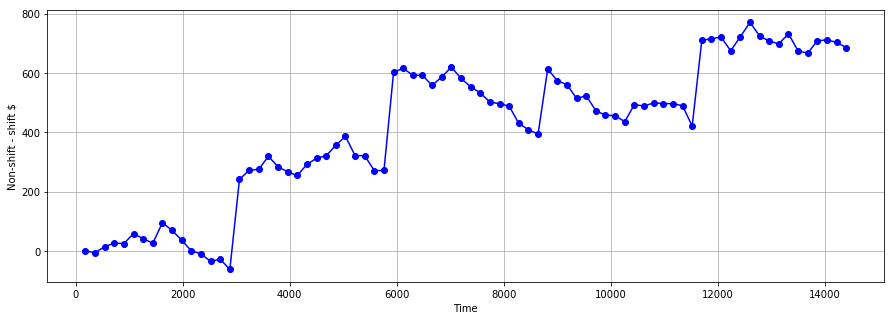

In [119]:
plt.figure(figsize=(15,5))
plt.plot(t,avg_income_2-avg_income_1,'bo-')
plt.ylabel("Non-shift - shift $")
plt.xlabel("Time")